In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
import os, sys
import numpy as np
import torch
import torchio as tio
import matplotlib.pyplot as plt

from DataProcessor import DataProcessor
from DataRotator import DataRotator

sys.path.insert(1, '../')
from scripts.utils import get_path

In [126]:
def get_stats(data):
    _min = data.min()
    _max = data.max()
    _mean = data.mean()
    _std = data.std()
    return {
        "min" : _min,
        "max" : _max,
        "mean" : _mean,
        "std" : _std,
    }

In [127]:
in_path = '/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade'
paths = {}

for name in os.listdir(in_path):
    print(name)
    p = get_path(f'{in_path}/{name}', 'head')
    paths.update({name: p})
    data = tio.ScalarImage(p).data[0].numpy()
    print(get_stats(data))

IXI077
{'min': 0.0, 'max': 3408.5864, 'mean': 91.937675, 'std': 141.38676}
IXI300
{'min': 0.0, 'max': 520.0, 'mean': 16.560219, 'std': 20.840284}
IXI057
{'min': 0.0, 'max': 4807.2754, 'mean': 184.488, 'std': 247.22028}
IXI129
{'min': 0.0, 'max': 2513.8623, 'mean': 85.73611, 'std': 107.78495}
IXI282
{'min': 0, 'max': 466, 'mean': 19.20392028808594, 'std': 25.389150063771215}
IXI083
{'min': 0.0, 'max': 5924.768, 'mean': 231.28008, 'std': 286.99017}
IXI200
{'min': 0, 'max': 592, 'mean': 16.33749038696289, 'std': 22.013085886463397}
IXI111
{'min': 0.0, 'max': 2393.7747, 'mean': 78.18812, 'std': 103.84128}
IXI201
{'min': 0, 'max': 449, 'mean': 18.623468551635742, 'std': 25.009902298394664}
IXI131
{'min': 0, 'max': 599, 'mean': 21.03219482421875, 'std': 27.20387187677799}
IXI164
{'min': 0, 'max': 412, 'mean': 14.966820106506347, 'std': 18.982923088837065}
IXI137
{'min': 0, 'max': 494, 'mean': 19.529068069458006, 'std': 25.390536676584013}
IXI278
{'min': 0, 'max': 495, 'mean': 20.423132400512

In [103]:
paths

{'IXI077': '/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade/IXI077/IXI077_head.nii.gz',
 'IXI300': ['/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade/IXI300/IXI300_head.nii.gz',
  '/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade/IXI300/IXI300_head_.nii.gz'],
 'IXI057': '/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade/IXI057/IXI057_head.nii.gz',
 'IXI129': '/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade/IXI129/IXI129_head.nii.gz',
 'IXI282': '/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade/IXI282/IXI282_head.nii.gz',
 'IXI083': '/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade/IXI083/IXI083_head.nii.gz',
 'IXI200': '/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade/IXI200/IXI200_head.nii.gz',
 'IXI111': '/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade/IXI111/IXI111_head.nii.gz',
 'IXI201': '/home/msst/Documents/medtech/data/HessData_IXI/DATA/HandMade/IXI201/IXI201_head.nii.g

In [165]:
keys = list(paths.keys())

def get_data_by_idx(idx, norm=None):
    data = tio.ScalarImage(paths[keys[idx]]).data[0].numpy()

    if norm is None:
        pass
    elif norm=='znorm':
        data = (data-data.mean())/data.std()
    elif norm=='minmax':
        q = 0.001
        q_min = np.quantile(data, q)
        q_max = np.quantile(data, 1-q)
        data = np.clip(data, q_min, q_max)
        data = (data-q_min)/q_max
    return data

IXI077
{'min': 0.0, 'max': 1.0, 'mean': 0.12792511, 'std': 0.19310524}


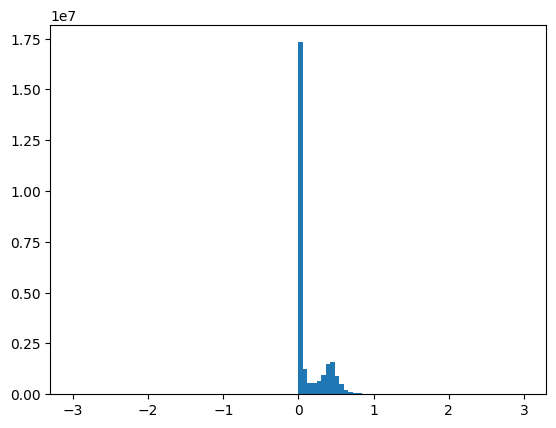

In [167]:
import matplotlib.pyplot as plt

keys = list(paths.keys())
idx = 0
print(keys[idx])

data = get_data_by_idx(idx, norm='minmax')
print(get_stats(data))

_ = plt.hist(data.flatten(), bins=100, range=(-3, 3))

In [187]:
def add_hist(ax, data, range):
    ax.hist(data.flatten(), bins=500, range=range, alpha = 0.5, histtype='step')    

#histtype{'bar', 'barstacked', 'step', 'stepfilled'},

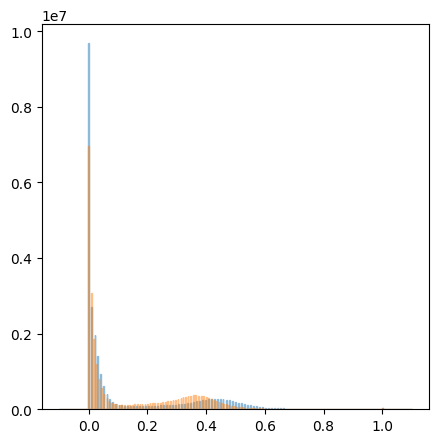

In [196]:
norm = 'minmax'

if norm == 'znorm':
    range = (-3, 3)
if norm == 'minmax':
    range = (-0.1, 1.1)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
add_hist(ax, get_data_by_idx(0, norm=norm), range=range)
add_hist(ax, get_data_by_idx(1, norm=norm), range=range)
pass

In [ ]:
tio.ScalarImage(get_path(p, 'head')

In [13]:
processor = DataProcessor(aug_coef=2, resample=None)#0.5)

in_path = '/home/msst/Documents/medtech/data/HessData_IXI/DATA/to_process'
out_path = "/home/msst/Documents/medtech/data/HessData_IXI/DATA/processed"

#in_path = '/home/msst/Documents/medtech/data/IXI_BrainExrtraction/DATA/to_process'
#out_path = '/home/msst/Documents/medtech/data/IXI_BrainExrtraction/DATA/processed'

processor(in_path, out_path)

IXI057


100%|█████████████████████████████████████████████| 1/1 [00:30<00:00, 30.37s/it]


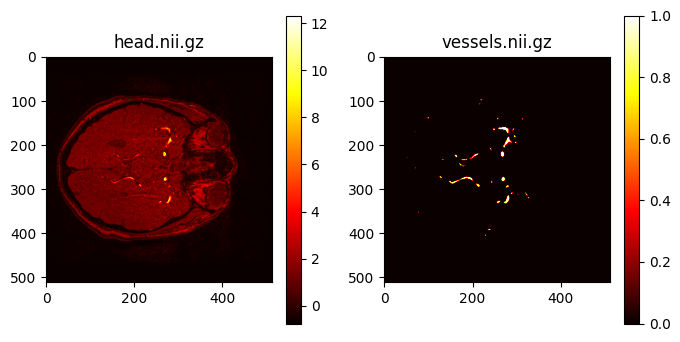

In [100]:
#rotator = DataRotator("/home/msst/Documents/medtech/data/HessData_IXI/DATA/processed/IXI278_0/", new_file=False)
rotator = DataRotator("/home/msst/Documents/medtech/data/HessData_IXI/train/IXI217_0", new_file=False)
rotator.show(35)

# rotator.transpose()
# rotator.mirror()
# rotator.show(35)

#rotator.save()